In [17]:
import numpy as np
import scipy.optimize as sopt
import matplotlib.pyplot as plt
import pydae.ssa as ssa
import pydae.grid_tools as gt
from pydae.tools import get_i
import json
import time

In [18]:
from grid_trafo_2bus import grid_trafo_2bus_class

In [19]:
grid = grid_trafo_2bus_class()
grid.initialization_tol = 1e-8
grid.initialize([{'p_B3': 10e3,'q_B3':0.0,
                  'p_B4_a':-20e3,'p_B4_b':-20e3,'p_B4_c':-20e3}],xy0='xy_0_dict.json', 
                   compile=False)
gt_grid = gt.grid(grid)
grid.report_y()

initialization not found!
v_B4_a_r =  0.00
v_B4_a_i =  0.00
v_B4_b_r =  0.00
v_B4_b_i =  0.00
v_B4_c_r =  0.00
v_B4_c_i =  0.00
v_B4_n_r =  0.00
v_B4_n_i =  0.00
v_B2_a_r =  0.00
v_B2_a_i =  0.00
v_B2_b_r =  0.00
v_B2_b_i =  0.00
v_B2_c_r =  0.00
v_B2_c_i =  0.00
v_B2_n_r =  0.00
v_B2_n_i =  0.00
v_B3_a_r =  0.00
v_B3_a_i =  0.00
v_B3_b_r =  0.00
v_B3_b_i =  0.00
v_B3_c_r =  0.00
v_B3_c_i =  0.00
v_B3_n_r =  0.00
v_B3_n_i =  0.00
v_B2dc_n_r =  0.00
v_B2dc_n_i =  0.00
v_B3dc_a_r =  0.00
v_B3dc_a_i =  0.00
v_B3dc_b_r =  0.00
v_B3dc_b_i =  0.00
v_B3dc_c_r =  0.00
v_B3dc_c_i =  0.00
v_B3dc_n_r =  0.00
v_B3dc_n_i =  0.00
i_l_B2dc_B3dc_a_r =  0.00
i_l_B2dc_B3dc_a_i =  0.00
i_l_B2dc_B3dc_b_r =  0.00
i_l_B2dc_B3dc_b_i =  0.00
i_l_B2dc_B3dc_c_r =  0.00
i_l_B2dc_B3dc_c_i =  0.00
i_l_B2dc_B3dc_n_r =  0.00
i_l_B2dc_B3dc_n_i =  0.00
i_B4_a_r =  0.00
i_B4_a_i =  0.00
i_B4_b_r =  0.00
i_B4_b_i =  0.00
i_B4_c_r =  0.00
i_B4_c_i =  0.00
i_B4_n_r =  0.00
i_B4_n_i =  0.00
i_B2_a_r =  0.00
i_B2_b_r =  0.0

In [16]:
gt_grid.dae2vi()
gt_grid.get_v()
gt_grid.get_i()

gt_grid.bokeh_tools()

gt.plot_results(gt_grid)

Figure(id='1145', ...)

In [17]:
grid = grid_trafo_2bus_class()

def obj_eval(x):
    p_B3 = x[0]
    p_B4 = -60e3
    grid.initialization_tol = 1e-8
    grid.initialize([{'p_B3': p_B3,'q_B3':0.0,
                      'p_B4_a':p_B4/3,'p_B4_b':p_B4/3,'p_B4_c':p_B4/3}],xy0='xy_0_dict.json')

    bus_from,bus_to = 'B1','B2'
    i_t_r_list = []
    i_t_i_list = []
    for ph in ['a','b','c']:
        i_t_r_list += [f'i_t_{bus_from}_{bus_to}_{ph}_r']
        i_t_i_list += [f'i_t_{bus_from}_{bus_to}_{ph}_i']
    i_t = np.array(grid.get_mvalue(i_t_r_list)) +1j*np.array(grid.get_mvalue(i_t_i_list))

    v_t = gt.get_voltage(grid,'B1',output='v_abcn')

    s_t = v_t.T @ np.conj(i_t).reshape(3,1)

    return float(s_t.real)


In [18]:
p_loss_list = []
p_dc = np.linspace(0,30e3,200)
for p in p_dc:
    p_loss_list += [obj_eval([p])] 
p_loss = np.array(p_loss_list)

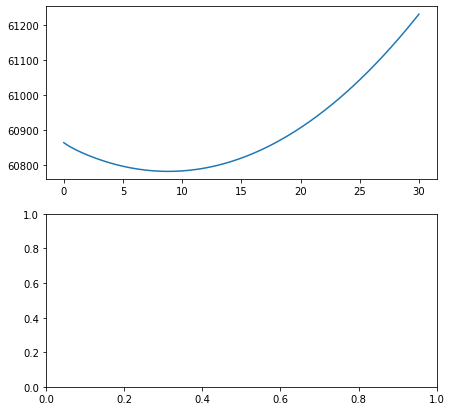

In [19]:
fig,  axes   = plt.subplots(nrows=2,ncols=1, figsize=(7, 7))
axes[0].plot(p_dc/1e3,p_loss)

In [ ]:
alpha = np.exp(2.0/3*np.pi*1j)
A_0a =  np.array([[1, 1, 1],
                  [1, alpha**2, alpha],
                  [1, alpha, alpha**2]])

A_a0 = 1/3*np.array([[1, 1, 1],
                                     [1, alpha, alpha**2],
                                     [1, alpha**2, alpha]])

In [ ]:
grid = grid_trafo_2bus_class()
grid.initialization_tol = 1e-7
grid.initialize([{}],xy0='xy_0_dict.json')
gt_grid = gt.grid(grid)

p_ac_B2 = 0.0
p_ac_B3   = 0.0
p_ac_B3dc = 0.0
p_B3_ac_f = 0.0
p_B3_ac = 10e3
for it in range(100):
    
    # ac/dc
    gt_grid.dae2vi()
    gt_grid.get_v()
    gt_grid.get_i()
    p_dc_B2dc = gt_grid.I_lines[15+3]*800
    v_zpn = A_a0 @ gt.get_voltage(grid,'B2',output='v_abcn')
    q_B2_ac = 0e3
    p_B2_ac = p_dc_B2dc
  
    s_B2_ac = p_B2_ac + 1j*q_B2_ac
    v_B2_abcn = gt.get_voltage(grid,'B2',output='v_abcn')
    #s_zpn = np.array([0,s_ac[0],0]).reshape((3,1))
    #i_zpn = np.conj(s_zpn/(3*v_zpn))
    #i_abc = A_0a @ i_zpn
    i_abc_B2 = np.conj(s_B2_ac / (3*v_B2_abcn))
    bus_name = 'B2'
    it1 = 0
    for ph in ['a','b','c']:
        #print(f'i_{bus_name}_{ph}_r',i_abc_B2[it1].real)
        grid.set_value(f'i_{bus_name}_{ph}_r',i_abc_B2[it1].real)  
        grid.set_value(f'i_{bus_name}_{ph}_i',i_abc_B2[it1].imag)  
        it1 += 1
        
    # dc/ac
    
    p_B3_ac_f = p_B3_ac_f + 0.01*(p_B3_ac - p_B3_ac_f)
    q_B3_ac = 0.0
    s_B3_ac = p_B3_ac_f +1j*q_B3_ac
    v_abcn = gt.get_voltage(grid,'B3',output='v_abcn')
    #v_zpn = A_a0 @ v_abcn
    #s_zpn = np.array([0,s_B3_ac,0]).reshape((3,1))
    #i_zpn = np.conj(s_zpn/(3*v_zpn))
    i_abc_B3 = np.conj(s_B3_ac / (3*v_abcn))
    bus_name = 'B3'
    it1 = 0
    for ph in ['a','b','c']:
        grid.set_value(f'i_{bus_name}_{ph}_r',i_abc_B3[it1].real)  
        grid.set_value(f'i_{bus_name}_{ph}_i',i_abc_B3[it1].imag)  
        it1 += 1
    i_n = -np.sum(i_abc_B3)
    grid.set_value(f'i_{bus_name}_n_r', i_n.real)  
    grid.set_value(f'i_{bus_name}_n_i', i_n.imag)  
        
    v_dc = gt.get_voltage(grid,'B3dc',output='v_an')
    p_ac = 0e3
    p_dc = p_B3_ac
    i_dc = -p_dc/v_dc
    
    bus_name = 'B3dc'
    
    grid.set_value(f'i_{bus_name}_a_r', i_dc.real)
    grid.set_value(f'i_{bus_name}_a_i', 0.0)
    grid.set_value(f'i_{bus_name}_n_r',-i_dc.real)
    grid.set_value(f'i_{bus_name}_n_i',-0.0) 
    
    grid.initialize([{'p_B4_a':0,'p_B4_b':0,'p_B4_c':0,
                      'q_B4_a':0,'q_B4_b':0,'q_B4_c':0}],'prev')
    
    print(p_B3_ac_f)


    

In [ ]:
grid.report_u()

In [21]:
gt_grid.I_lines[15+3]

array([-12.50412381+0.j])

In [27]:
p_dc_B2dc

array([0.+0.j])

In [ ]:
grid_gt.I_lines[11+3]

In [29]:
np.abs(gt_grid.I_lines)

array([[2.67541750e-12],
       [2.43300457e-12],
       [2.13635991e-12],
       [2.16483825e-10],
       [4.06738396e-12],
       [1.99594202e-10],
       [3.74552843e-10],
       [2.97848157e-10],
       [1.18840093e-10],
       [1.58501786e-10],
       [1.24031068e-10],
       [1.08325530e-11],
       [2.17569263e-11],
       [8.55441493e-12],
       [7.59087891e-12],
       [0.00000000e+00],
       [0.00000000e+00],
       [0.00000000e+00],
       [0.00000000e+00],
       [2.59159559e-10],
       [0.00000000e+00]])

In [24]:
i_abc_B2

array([[ 0.-0.j],
       [-0.+0.j],
       [ 0.+0.j]])

In [3]:
bokeh.__version__

'2.0.0'